## Plot of the SW potentials

As it was shown in the development of `potential A` and `potential B`, SW potential can be tweaked to produce either fcc or diamond as the lowest energy structure. In this notebook, I will explore why either structure is stabilized and which SW parameters contribute to it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from stillingerweber.sw import Sw
import pyscal.core as pc
import pyscal.crystal_structures as pcs

`Potential A` which favors diamond structure would be referred to as `Ad`

In [2]:
Ad = Sw("Ad", epsilon=2.1683, sigma=2.0951, a=1.80, lmbda=32.5,
       gamma=1.20, costheta0=-0.3333, A=7.9170, B=0.76728,
       p=4, q=0)

`Potential B` which favors fcc structure would be referred to as `Af`

In [3]:
Af = Sw("Af", epsilon=1.393, sigma=2.3677, a=1.53, lmbda=32.5,
       gamma=1.20, costheta0=-0.3333, A=7.9170, B=0.76728,
       p=4, q=0)

Cutoff for each of the potential is given by $\sigma * a$

In [4]:
Ad_rij = np.linspace(1.0, Ad.sigma*Ad.a, 1000)
Af_rij = np.linspace(1.0, Af.sigma*Af.a, 1000)

In [44]:
max(Ad_rij)

3.77118

In [45]:
max(Af_rij)

3.6225810000000003

### Potential A

Calculating the 2 body term -  
$E = \sum_i\sum_{j>i} \phi_2(r_{ij}) + \sum_i\sum_{j\neq i}\sum_{k> j} \phi_3(r_{ij}, r_{ik}, \theta_{ijk})$

The lattice constants from calculation of E-V curve

In [5]:
Ad_fcc_alat = 4.253220814538102
Ad_dia_alat = 5.63104614813484

and the minimum energies..

In [6]:
Ad_fcc_e_act = -3.323635546666218
Ad_dia_e_act = -4.1481614681153065

In [7]:
Ad_dia_e_act - Ad_fcc_e_act

-0.8245259214490885

Now the two body term,

In [9]:
Ad_phi2 = Ad.phi2(Ad_rij)

In order to understand the contribution from 2 body terms - we have to find where the neighbors lie-

In [10]:
Ad_fcc_nn = (np.sqrt(2)/2)*Ad_fcc_alat
Ad_dia_nn = (np.sqrt(3)/4)*Ad_dia_alat

Plot and see where they lie..

(1.5, 3.5)

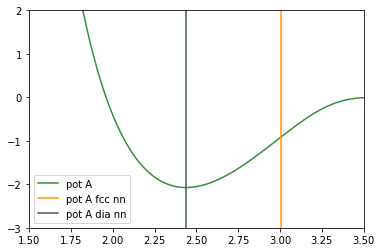

In [11]:
plt.plot(Ad_rij, Ad_phi2, label="pot A", color='#388E3C')
plt.axvline(Ad_fcc_nn, label="pot A fcc nn", color='#FF9800')
plt.axvline(Ad_dia_nn, label="pot A dia nn", color='#455A64')
plt.legend()
plt.ylim(-3,2)
plt.xlim(1.5,3.5)

Energy diff between fcc and dia from two body term, considering 4 neighbors for diamond and 12 for fcc

In [12]:
Ad_2body_ediff = 0.5*4*Ad.phi2(Ad_dia_nn) - 0.5*12*Ad.phi2(Ad_fcc_nn)
Ad_2body_ediff

1.2829226745089048

In [19]:
0.5*4*Ad.phi2(Ad_dia_nn)

-4.147676382493027

This actually means fcc is more stable! The stability of diamond structure must come from the three body term. The three body term contribution is given by,

$\phi_3(r_{ij}, r_{ik}, \theta_{ijk}) = \lambda_{ijk} \epsilon_{ijk} [\cos \theta_{ijk} - \cos \theta_{0ijk}]^2 \exp{\bigg( \frac{\sigma_{ij}}{r_{ij} - a_{ij} \sigma_{ij}} \bigg)} \exp{\bigg( \frac{\sigma_{ij}}{r_{ij} - a_{ij} \sigma_{ij}} \bigg)}$

Since the $\cos \theta_0$ term is -0.33, $\phi_3$ for diamond is 0. However, for fcc this contribution is not zero.

A perfect fcc has 66 angles around it formed by 12 neighbors ($^{12}C_2$) -   
- $60^0$ x 24
- $90^0$ x 12
- $120^0$ x 24
- $180^0$ x 6

In [13]:
np.cos(60*np.pi/180), np.cos(90*np.pi/180), np.cos(120*np.pi/180), np.cos(180*np.pi/180)

(0.5000000000000001, 6.123233995736766e-17, -0.4999999999999998, -1.0)

All of the angles would be penalised! A plot of three body terms-

Text(0.5, 1.0, '$\\phi_3$ for $\\cos\\theta=0.5$')

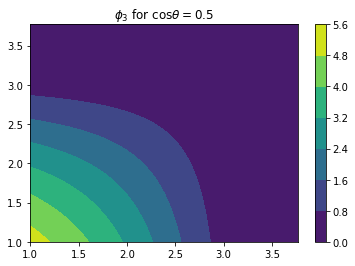

In [15]:
xx, yy = np.meshgrid(Ad_rij, Ad_rij)
Ad_phi3_fcc = Ad.phi3(xx, yy, 0.50)
plt.contourf(xx, yy, Ad_phi3_fcc)
plt.colorbar()
plt.title("$\phi_3$ for $\cos\\theta=0.5$") 

Evaluation of each three body contribution

In [16]:
d60c = Ad.phi3(Ad_fcc_nn, Ad_fcc_nn, 0.5)
d90c = Ad.phi3(Ad_fcc_nn, Ad_fcc_nn, 0.0)
d120c = Ad.phi3(Ad_fcc_nn, Ad_fcc_nn, -0.5)
d180c = Ad.phi3(Ad_fcc_nn, Ad_fcc_nn, -1)

Summing up the contribution,

In [18]:
Ad_3body_ediff = 0-(d60c*24 + d90c*12 + d120c*24 + d180c*6)
Ad_3body_ediff

-1.3426218705105357

The total of 3 body is not as expected - I have to fix it -> but two body is correct - the stabilisation comes from three body

At least for this potential - the stabilisation of dia comes from the three body term - That is $\lambda$ would directly influence how much more stable diamond is

In [20]:
Af_fcc_alat = 4.008914377967472
Af_dia_alat = 5.885578248067709

In [21]:
Af_fcc_nn = (np.sqrt(2)/2)*Af_fcc_alat
Af_dia_nn = (np.sqrt(3)/4)*Af_dia_alat

In [22]:
Af_fcc_e_actual = -1.3133698468550736
Af_dia_e_actual = -1.0187360228169908

In [23]:
Af_dia_e_actual -Af_fcc_e_actual

0.2946338240380828

/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/stillingerweber-0.0.1-py3.7.egg/stillingerweber/sw.py:52: RuntimeWarning: divide by zero encountered in true_divide


(1.5, 3.5)

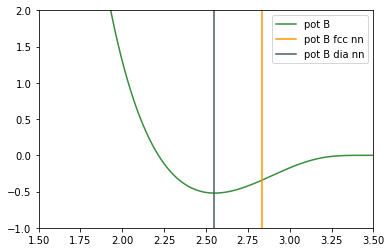

In [35]:
plt.plot(Af_rij, Af.phi2(Af_rij), label="pot B", color='#388E3C')
plt.axvline(Af_fcc_nn, label="pot B fcc nn", color='#FF9800')
plt.axvline(Af_dia_nn, label="pot B dia nn", color='#455A64')

plt.legend()
plt.ylim(-1,2)
plt.xlim(1.5,3.5)

In [26]:
Af_2body_ediff = 0.5*4*Af.phi2(Af_dia_nn) - 0.5*12*Af.phi2(Af_fcc_nn)
Af_2body_ediff

1.0110294652445617

Fcc is more stable here due to the compact structure

In [27]:
f60c = Af.phi3(Af_fcc_nn, Af_fcc_nn, 0.5)
f90c = Af.phi3(Af_fcc_nn, Af_fcc_nn, 0.0)
f120c = Af.phi3(Af_fcc_nn, Af_fcc_nn, -0.5)
f180c = Af.phi3(Af_fcc_nn, Af_fcc_nn, -1)

Summing up the contribution,

In [28]:
Af_3body_ediff = (f60c*24 + f90c*12 + f120c*24 + f180c*6)
Af_3body_ediff

0.4600432018899963

In [31]:
(Af_2body_ediff - Af_3body_ediff)

0.5509862633545655

Once again, the three body numbers are not correct - We have to see why.

Comparison of the two potentials

/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/stillingerweber-0.0.1-py3.7.egg/stillingerweber/sw.py:52: RuntimeWarning: divide by zero encountered in true_divide
/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/stillingerweber-0.0.1-py3.7.egg/stillingerweber/sw.py:52: RuntimeWarning: divide by zero encountered in true_divide


(1.5, 3.5)

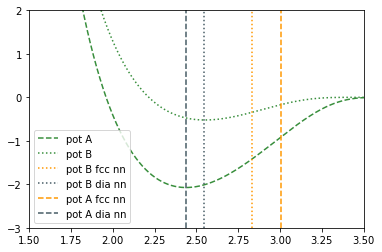

In [43]:
plt.plot(Ad_rij, Ad.phi2(Ad_rij), linestyle='dashed', label="pot A", color='#388E3C')
plt.plot(Af_rij, Af.phi2(Af_rij), linestyle='dotted', label="pot B", color='#388E3C')
plt.axvline(Af_fcc_nn, linestyle='dotted', label="pot B fcc nn", color='#FF9800')
plt.axvline(Af_dia_nn, linestyle='dotted', label="pot B dia nn", color='#455A64')
plt.axvline(Ad_fcc_nn, linestyle='dashed', label="pot A fcc nn", color='#FF9800')
plt.axvline(Ad_dia_nn, linestyle='dashed', label="pot A dia nn", color='#455A64')
plt.legend()
plt.ylim(-3,2)
plt.xlim(1.5,3.5)

Strategy to switch from Diamond to FCC -> Reduce the depth of well with epsilon, so that ediff between diamond and fcc is less 

## Things to do-

- check three body penalty for bcc
- change $\sigma$ and it's effect on the equilibrium volume
- Choose 6 different potentials:
    - $\lambda$ fixed, change $\epsilon$ and calculate $T_m$
    - $\epsilon$ fixed, change $\lambda$ and calculate $T_m$